# Displaying Properties Using Animation

Back in 1975, I spent a month visiting the Aerodynamics group at NASA Ames Research Station at Moffet Field in Mountain View, California. There I could work with some of the best researchers in the business. In fact, I had met several of these folks at AIAA conferences, since I was using code developed there for my Masters's Thesis at Virginia Tech. 

NASA had several leading-edge machines at that facility. The biggest machine was an ILLIAC IV.

<div> <img src="images/ILLIAC_4_parallel_computer.jpg" alt="ILLIAC IV" style="width: 600px;"/></div>

This was the first "massively parallel" machines available, and it was potentially more powerful than the Cray-1 Supercomputer (which actually became \available a year after Illiac) we had access to back at ARL.

I took the original code I had developed and set it up to run on one of their more normal machines. I also worked with a graphics terminal they had set up there and created a movie of the solution as it evolved. The movie was shot frame by frame using single plots of the solution as they were created. It was painful to do, but fun to watch. The movie provided insights into how the solution evolved that were hard to get reading a bunch of numbers. This was my first attempt to create an animation, and it was a lot of fun! 

The terminal was basically a huge oscilloscope, an old "Cathode Ray" device that moved a beam of electrons around painting lines in the phosphor coating on the inside of the tube. This was the same technology that powered early television sets. A camera was mounted in a hood that swung over the display so you could take a picture of each single frame. Tedious work, but I managed to build several movies this way, including a wireframe image of an F-16 jet, banking and "flying" out of the scene. I even wrote the hidden line software that showed the wireframe as though it was on a solid surface with lines painted on it!


For this current study, I decided to recreate this display, only now it is much easier since graphics software is now very common. 

We will use a powerful package called **matplotlib** which is very popular among data scientists, to create the animation.

The movie I created showed the total pressure distribution between the body and the outer boundary. That plot enables us to see the boundary layer region near the body, and the shock formation near the outer edge of the computational field.

Since the solution scheme actually runs in two parts, we will see both at work. Initially, we will see the evolution of the conical flow assumption used to get an initial condition for the actual parabolized Navier-Stokes solution that sweeps over the body. 

## **matplotlib** setup

I will set up this animation as a separate program that reads data from a file. That way I can see the same display when I run the Fortran version of the study code later. In this note, so you can see how the animation is created, and actually see the results live on this page (assuming you running it using the *Jupyter-Lab Notebook* program.

### Program Setup

We start off by installing a couple of Python Packages:

```{code}
$ pip install matplotlib
$ pip install numpy
```

On my development machine, I also needed to install a couple of supporting tools:

```{code} shell
brew install ffmpeg
brew install 
```


In [1]:
import numpy as np

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
matplotlib.rc('animation', html='html5')

from ipywidgets import interact, interactive, widgets
from IPython.display import display

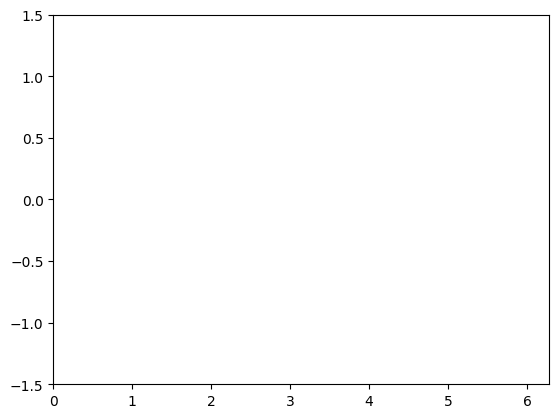

In [2]:
MyFigure, MyAxes = plt.subplots()
MyAxes.set_xlim(( 0, 2*np.pi))
MyAxes.set_ylim((-1.5, 1.5))
MyLine, = MyAxes.plot([], [], lw=2)

In [3]:
x=np.linspace(0,2*np.pi)
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 20 #in msec (20 gives 50 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 2.0 seconds long.


In [4]:
def a(i):
    y = np.sin(x + 2*np.pi*i/AnimationFrames)
    MyLine.set_data(x, y)
    return (MyLine,)

In [5]:
MyAnimation = animation.FuncAnimation(MyFigure, a,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=True)

In [6]:
MyAnimation